# Import Library

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. Muat Data

In [10]:
try:
    data = pd.read_csv('data.csv', sep=',')
    print(f"Data Penjualan Windows berhasil dimuat. Jumlah baris: {len(data)}")
except FileNotFoundError:
    print("Pastikan file 'data.csv' ada di direktori yang sama.")
    exit()

# ingat ini untuk hapus kolom yang tidak digunakan
data = data.drop(columns=['Customer_ID', 'Nama', 'Tanggal_Registrasi'])

Data Penjualan Windows berhasil dimuat. Jumlah baris: 10500


# B. Split Independent Dependent Variable

In [11]:
TARGET_COLUMN = 'Beli_Windows' 

X = data.drop(TARGET_COLUMN, axis=1)
y = data[TARGET_COLUMN]

# Split Train Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data Training: {len(X_train)}, Data Testing: {len(X_test)}")

Data Training: 8400, Data Testing: 2100


# C. Definisikan Preprocessing

In [12]:

numerical_features = ['Usia', 'Penghasilan_Bulanan_Juta', 'Kemampuan_Teknologi', 'Kebutuhan_Bisnis']

categorical_features = ['Pekerjaan'] 


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

print("Preprocessor telah didefinisikan.")

Preprocessor telah didefinisikan.


# D. Algoritma 1 Random Forest Classifier

--- Memulai Training Random Forest (Model 1) ---

--- Random Forest Classifier Hasil ---
Akurasi: 0.8090
Classification Report (RF):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1302
           1       0.77      0.71      0.74       798

    accuracy                           0.81      2100
   macro avg       0.80      0.79      0.79      2100
weighted avg       0.81      0.81      0.81      2100



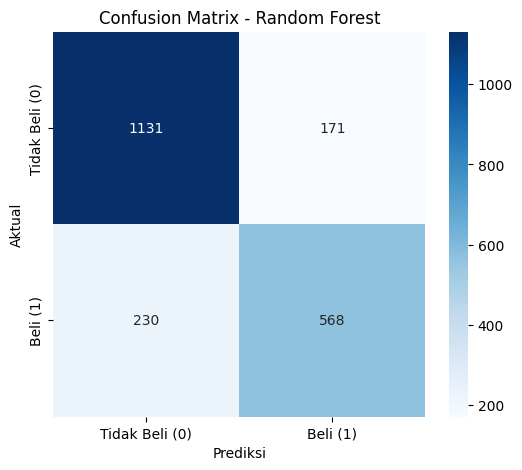

In [13]:
# Pipeline Random Forest Classifier (Model 1)
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

print("--- Memulai Training Random Forest (Model 1) ---")
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

print("\n--- Random Forest Classifier Hasil ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report (RF):")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Beli (0)', 'Beli (1)'], yticklabels=['Tidak Beli (0)', 'Beli (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# E. Algoritma Support Vector Classifier (SVC)

In [14]:
pipe_svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf', C=1.0, random_state=42))]) 

print("--- Memulai Training SVC (Model 2) ---")
pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

print("\n--- Support Vector Classifier Hasil ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svc):.4f}")
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

--- Memulai Training SVC (Model 2) ---

--- Support Vector Classifier Hasil ---
Akurasi: 0.8195
Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1302
           1       0.78      0.73      0.76       798

    accuracy                           0.82      2100
   macro avg       0.81      0.80      0.81      2100
weighted avg       0.82      0.82      0.82      2100



# F. Matrix Confusion

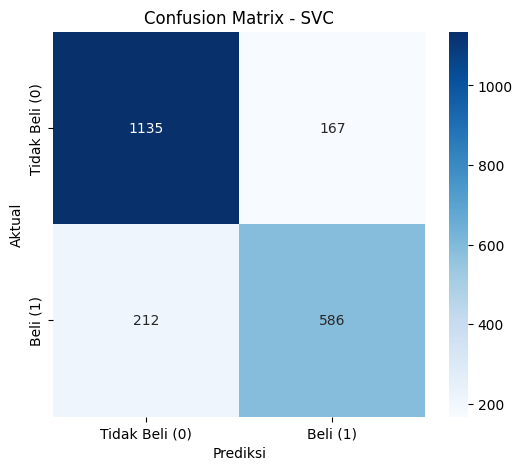

In [15]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Beli (0)', 'Beli (1)'], yticklabels=['Tidak Beli (0)', 'Beli (1)'])
plt.title('Confusion Matrix - SVC')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# G. Simpan Model

In [16]:
# Bandingkan F1-Score untuk kelas '1' (Beli Windows)
f1_rf = classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
f1_svc = classification_report(y_test, y_pred_svc, output_dict=True)['1']['f1-score']

if f1_rf > f1_svc:
    model_terbaik = pipe_rf
    print("\nModel terbaik: Random Forest.")
else:
    model_terbaik = pipe_svc
    print("\nModel terbaik: SVC.")

# simpan model
joblib.dump(model_terbaik, 'beli_windows.pkl')
print(f"Model terbaik disimpan sebagai 'beli_windows.pkl'")


Model terbaik: SVC.
Model terbaik disimpan sebagai 'beli_windows.pkl'
